---  
## Python for Finance: Investment Fundamentals & Data Analytics
(Udemy)

In [1]:
# https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5
# https://medium.com/python-data/effient-frontier-in-python-34b0c3043314

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from scipy.stats import norm

ModuleNotFoundError: No module named 'pandas_datareader'

In [3]:
assets = "BBDC4 BPAC11 GGBR4 JBSS3 JHSF3 RENT3 PRIO3 SLCE3 VALE3 WEGE3".split(' ')
weights = [0.1, 0.1, 0.1 ,0.1, 0.075, 0.075, 0.125, 0.1, 0.125, 0.1]
assets = [f+'.SA' for f in assets]
assets_hist = {}

for a in assets:
    assets_hist[a] = pdr.DataReader(a, data_source='yahoo', start='2010-1-1')

In [4]:
for fi,df in assets_hist.items():
    df['daily_simple_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df['daily_log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['norm_adj_close'] = (df['Adj Close'] / df[ 'Adj Close'].iloc[0] * 100)

In [5]:
assets_hist['RENT3.SA'].head()

,High,Low,Open,Close,Volume,Adj Close,daily_simple_return,daily_log_return,norm_adj_close
Date,,,,,,,,,
2010-01-04,5.661015,5.442176,5.614944,5.614944,1562099.0,4.018217,NaN,NaN,100.000000
2010-01-05,5.770435,5.519922,5.609185,5.689810,2839769.0,4.071794,0.013334,0.013245,101.333351
2010-01-06,6.219630,5.701328,5.715725,6.133246,3740286.0,4.389128,0.077935,0.075047,109.230752
2010-01-07,6.084296,5.816506,6.084296,5.874095,1477361.0,4.203673,-0.042253,-0.043172,104.615400
2010-01-08,6.061260,5.773314,5.874095,5.928805,1273155.0,4.242826,0.009314,0.009271,105.589778


<AxesSubplot:xlabel='Date'>

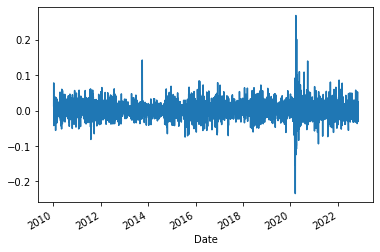

In [6]:
assets_hist['RENT3.SA']['daily_simple_return'].plot()

In [7]:
for fi,df in assets_hist.items():
    print(fi, '\t',df.iloc[0].name, '\t',df.iloc[-1].name)

BBDC4.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
BPAC11.SA 	 2017-02-24 00:00:00 	 2022-11-08 00:00:00
GGBR4.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
JBSS3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
JHSF3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
RENT3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
PRIO3.SA 	 2010-10-25 00:00:00 	 2022-11-08 00:00:00
SLCE3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
VALE3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00
WEGE3.SA 	 2010-01-04 00:00:00 	 2022-11-08 00:00:00


In [8]:
def get_oneCol_eachKey(stocks_dict, col):
    df_allFiis_oneCol = pd.concat( [df[col] for fi,df in stocks_dict.items()], axis=1, keys=assets_hist)
    return df_allFiis_oneCol

teste = get_oneCol_eachKey(stocks_dict=assets_hist, col='daily_simple_return')
teste.head()

,BBDC4.SA,BPAC11.SA,GGBR4.SA,JBSS3.SA,JHSF3.SA,RENT3.SA,PRIO3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004921,NaN,0.016892,-0.009307,-0.029334,0.013334,NaN,0.006098,0.009322,-0.002182
2010-01-06,-0.008000,NaN,0.006644,0.015658,0.024725,0.077935,NaN,0.050909,0.021166,0.005467
2010-01-07,-0.002688,NaN,-0.022442,0.022610,0.010724,-0.042253,NaN,0.026528,0.004145,0.016857
2010-01-08,-0.001078,NaN,-0.002701,0.001005,0.002652,0.009314,NaN,0.061798,0.009758,0.036364


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


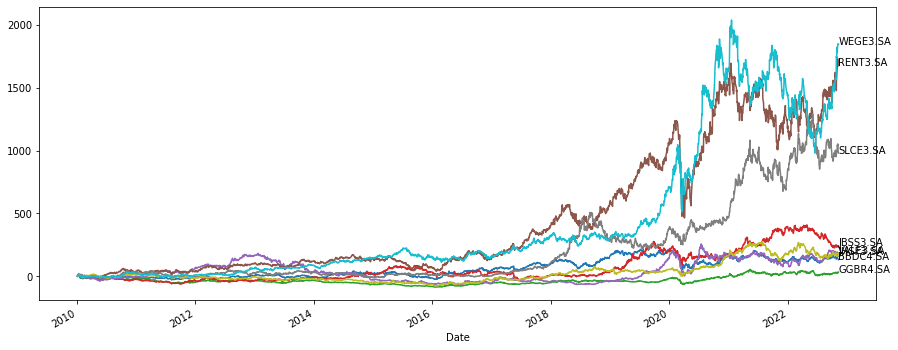

In [9]:
df_close = get_oneCol_eachKey(stocks_dict=assets_hist, col='Adj Close')
((df_close / df_close.iloc[0] * 100)-100).plot(figsize=(15,6), legend=None)

# https://www.python-graph-gallery.com/web-line-chart-with-labels-at-line-end
for c in df_close:
    plt.text(x= df_close.iloc[-1].name,
             y= ((df_close[c].iloc[-1] / df_close[c].iloc[0] * 100)-100),
             s= c)

In [10]:
annual_returns = teste.mean() * 250
portfolio_returns = np.dot(annual_returns, weights)
print(f'Portfolio annual returns: {portfolio_returns:.2%}')

Portfolio annual returns: 24.43%


In [11]:
indices = {'ibovespa':'^BVSP', 'sp500':'^GSPC', 'nasdaq':'^IXIC'}
cols = ['Adj Close']
df_ind = pd.DataFrame()

for name,ind in indices.items():
    df_ind[name] = pdr.DataReader(ind, data_source='yahoo', start='2010-1-1')[cols]

<AxesSubplot:xlabel='Date'>

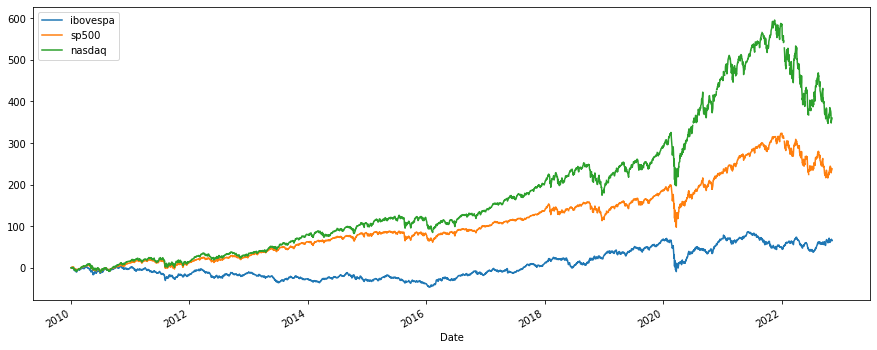

In [12]:
((df_ind / df_ind.iloc[0] * 100)-100).plot(figsize=(15,6))

In [13]:
ind_returns = (df_ind / df_ind.shift(1)) -1
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

ibovespa    0.069943
sp500       0.119990
nasdaq      0.143113
dtype: float64

---

In [14]:
# Risk calc -------------------------------------------------------------
df_log_return = get_oneCol_eachKey(stocks_dict=assets_hist, col='daily_log_return')
df_log_return.head()

,BBDC4.SA,BPAC11.SA,GGBR4.SA,JBSS3.SA,JHSF3.SA,RENT3.SA,PRIO3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004933,NaN,0.016751,-0.009351,-0.029772,0.013245,NaN,0.006079,0.009279,-0.002184
2010-01-06,-0.008032,NaN,0.006622,0.015536,0.024425,0.075047,NaN,0.049656,0.020945,0.005453
2010-01-07,-0.002692,NaN,-0.022698,0.022359,0.010667,-0.043172,NaN,0.026183,0.004137,0.016716
2010-01-08,-0.001078,NaN,-0.002705,0.001005,0.002649,0.009271,NaN,0.059963,0.009711,0.035718


In [15]:
#check return of GGBR4
print(f"média: {df_log_return['GGBR4.SA'].mean():.3%}\t média anualizada: {df_log_return['GGBR4.SA'].mean() * 250:.3%}")

# check stdev
print(f"stdev: {df_log_return['GGBR4.SA'].std():.3%}\t stdev anualizada: {df_log_return['GGBR4.SA'].std() * 250 **0.5:.3%}")

média: 0.009%	 média anualizada: 2.154%
stdev: 2.756%	 stdev anualizada: 43.569%


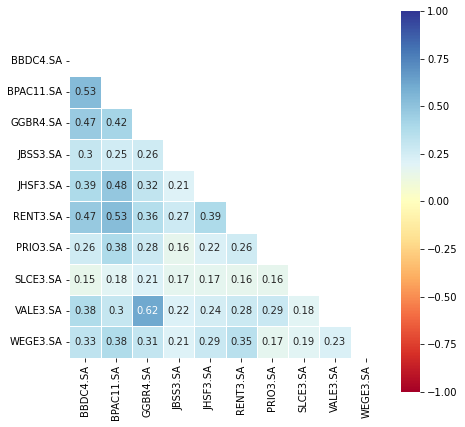

In [16]:
import seaborn as sns
# correlação entre as ações -----------------------------------------------------------
df_corr = df_log_return.corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_corr, annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask);

---

In [17]:
# portfolio risk ---------------------------------------------------------------
portfolio_var = np.dot(np.array(weights).T, np.dot(df_log_return.cov() * 250, weights))
portfolio_vol = portfolio_var**0.5
print(f'portfolio variance: {portfolio_var:.3%}, portfolio volatility: {portfolio_vol:.3%}')

portfolio variance: 7.560%, portfolio volatility: 27.496%


In [18]:
# diversifiable risk -----------------------------------------------------------------
# diversifiable risk = portfolio variance - weighted annual variances
div_risk = portfolio_var - ((df_log_return.var() * 250)* [w**2 for w in weights] ).sum()
print(f'diversifiable risk: {div_risk:.3%}')

# un-diversifiable risk -----------------------------------------------------------------
# un-diversifiable risk = portfolio variance - diversifiable risk
undiv_risk = portfolio_var - div_risk
print(f'un-diversifiable risk: {undiv_risk:.3%}')

print(f'risk: {portfolio_var:.3%}')

diversifiable risk: 5.209%
un-diversifiable risk: 2.351%
risk: 7.560%


In [19]:
np.random.choice(assets, 2)

array(['SLCE3.SA', 'JHSF3.SA'], dtype='<U9')

---

In [20]:
# efficient frontier (markowitz) ------------------------------------------------------------
df_log_return = get_oneCol_eachKey(stocks_dict=assets_hist, col='daily_log_return')

pfolio_returns = []
pfolio_volatilities = []
test = np.random.choice(assets, 3)
num_assets = len(test)  # len(assets)
k = 3000

# let's create k scenarios of different weights
for x in range(k):
    # creating random weights
    rand_weights = np.random.random(num_assets)
    rand_weights /= np.sum(rand_weights)
    # portfolio return
    #pfolio_returns.append(np.sum(rand_weights * df_log_return.mean()) * 250)
    pfolio_returns.append(np.sum(rand_weights * df_log_return[test].mean()) * 250)
    # portfolio volatility
    #pfolio_volatilities.append(np.sqrt(np.dot(rand_weights.T, np.dot(df_log_return.cov() * 250, rand_weights))))
    pfolio_volatilities.append(np.sqrt(np.dot(rand_weights.T, np.dot(df_log_return[test].cov() * 250, rand_weights))))

portfolios = pd.DataFrame({'return': np.array(pfolio_returns), 'volatility':np.array(pfolio_volatilities)})

portfolio considered: ['SLCE3.SA' 'JBSS3.SA' 'RENT3.SA']


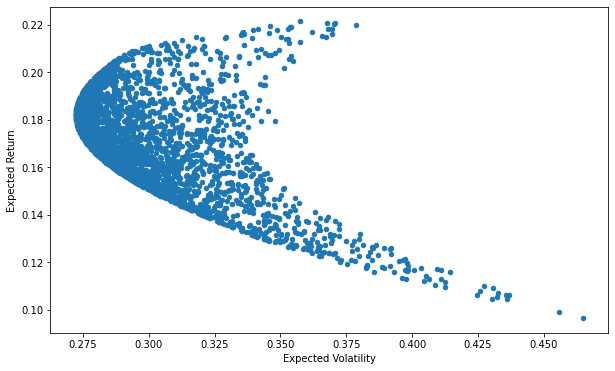

In [21]:
print(f'portfolio considered: {test}')
portfolios.plot(x= "volatility", y='return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

---

In [ ]:
# CAPM --------------------------------------------------------------------------------------
# Capital Assets Pricing Model

# ri = rf + Bim * (rm - rf)
# ri = return of investment
# rf = risk-free (p/ Brasil pode ser a taxa Selic)
# Bim = beta between stock and market
# rm = market return (ao comparar ações, pode considerar a média histórica de returno do Ibovespa)

# Calcular o Beta significa medir o risco de mercado que não pode 
# ser evitado mesmo com diversificação do portfólio.
# Ao comparar a ação com mercado, se:
# Beta = 0  >> ação não tem relação alguma com a movimentação do mercado
# Beta < 1  >> são considerados 'defensivos', pois ele vai seguir a flutuação do mercado, mas com menos intensidade
# Beta = 0  >> são considerados 'agressivos', pois ele vai seguir a flutuação do mercado, mas com mais intensidade
# (mais intensidade = se mercado subir ou descer, vai subir mais ou descer mais que outras ações)

In [22]:
# buscando uma ação e o ibovespa, para comparação da ação com o mercado como um todo
# já que o ibovepa é um índice que já considera várias outras ações

indices = {'ibovespa':'^BVSP', 'WEGE3':'WEGE3.SA'}
cols = ['Adj Close']
data = pd.DataFrame()

for name,ind in indices.items():
    data[name] = pdr.DataReader(ind, data_source='yahoo', start='2010-1-1')[cols]

returns = np.log(data/data.shift(1))
cov = returns.cov() * 250
cov_with_markt = cov.loc['WEGE3','ibovespa']
market_var = returns['ibovespa'].var() *250
beta = cov_with_markt / market_var
print(f'beta: {beta:.2%}')

beta: 61.29%


In [23]:
# rm: market return - média ibovespa
rm = returns['ibovespa'].mean() * 250
print(f'rm: {rm:.2%}')

rm: 3.98%


In [24]:
selic = pdr.DataReader('SELIC.BK', data_source='yahoo', start='2010-1-1')['Adj Close']
selic_return = np.log(selic/selic.shift(1))
rf = selic_return.mean() * 250
print(f'rf: {rf:.2%}')

rf: 4.53%


In [25]:
ri = rf + beta*(rm - rf)
print(f'ri: {ri:.2%}')

ri: 4.19%


---

In [26]:
# sharpe ration -----------------------------------------------------------------------
# sr = (ri - rf) / stock stdev

sr = (ri - rf) / (returns['WEGE3'].std() *250 ** 0.5)
print(f'sr: {sr:.2%}')

sr: -1.06%


---

In [27]:
# monte carlo ----------------------------------------------------------------------------
# for stock price forecasting
data = pd.DataFrame()
asset = 'WEGE3.SA'

data[asset] = pdr.DataReader(asset, data_source='yahoo', start='2010-1-1')['Adj Close']
data_return = np.log(1 + data.pct_change())
u = data_return.mean()
var = data_return.var()
drift = u - (0.5*var)
stdev = data_return.std()

# não anualizamos nada neste exercício pq faremos a preivsão de preço diária
# brownian motion >> r = drift + stdev * e^r

t_intervals = 1000   # quantos dias futuros serão previstos
iterations = 10   # quantos cenários serão simulados
er = norm.ppf(np.random.rand(t_intervals, iterations))

daily_returns = np.exp(drift.values + stdev.values * er )

# calculando os preços dia-a-dia
# St = S0 * daily_returns

s0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = s0
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

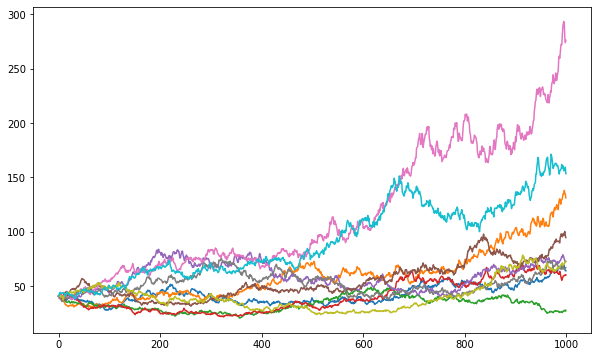

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

---

In [ ]:
# black scholes formula ----------------------------------------------------------------
# for derivatives pricing calculations ... irá calcular o valor de uma opção
# The holder of the option may decide he wants to buy the stock, but he may also decide he is better
# off without doing it. This freedom is valuable to every investor, hence it has a price.

# S = current stock price
# k = option strike price
# t = time until option expires
# r - risk-free interest rate  >> lembrando que para Brasil, pode ser a Selic
# s = sample stdev
# N = standard normal distribution
# e = exponentail term
# C = call premium

In [29]:
def d1(S, k, r, stdev, t):
    return (np.log(S/k) + (r+stdev**2 / 2) * t) / (stdev * np.sqrt(t))

def d2(S, k, r, stdev, t):
    return (np.log(S/k) + (r-stdev**2 / 2) * t) / (stdev * np.sqrt(t))

def BSM(S, k, r, stedv, t):
    return (S * norm.cdf(d1(S, k, r, stedv, t))) - (k * np.exp(-r * t) * norm.cdf(d2(S, k, r, stedv, t)))

In [30]:
selic = pdr.DataReader('SELIC.BK', data_source='yahoo', start='2010-1-1')['Adj Close']
selic_return = np.log(selic/selic.shift(1))
r = selic_return.mean() * 250
print(f'{r:.2%}')

4.53%


In [31]:
data = pd.DataFrame()
asset = 'WEGE3.SA'

data[asset] = pdr.DataReader(asset, data_source='yahoo', start='2010-1-1')['Adj Close']
data_return = np.log(1 + data.pct_change())
S = data.iloc[-1]
stdev = data_return.std() * 250 **0.5
print(f'{data.iloc[-1]}')

WEGE3.SA    40.799999
Name: 2022-11-08 00:00:00, dtype: float64


In [32]:
k = 47.0  # strike price
t = 1   # year

BSM(S, k, r, stdev, t)

WEGE3.SA    3.623233
Name: 2022-11-08 00:00:00, dtype: float64

---

In [37]:
# euler discretization ------------------------------------------------------------------------
# vamos usar os mesmos dados do exemplo anterior, com WEGE3

t = 1  # year
t_intervals = 250
delta_t = t / t_intervals
iterations = 10000

Z = np.random.standard_normal((t_intervals+1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r * 0.5 * stdev.values **2) * delta_t + stdev.values *delta_t ** 0.5 * Z[t])
S

array([[40.79999924, 40.79999924, 40.79999924, ..., 40.79999924,
        40.79999924, 40.79999924],
       [41.79500844, 38.95756254, 41.9827347 , ..., 40.88825414,
        41.31901369, 40.67777194],
       [43.46084873, 39.35145054, 41.26029174, ..., 39.89168292,
        40.92951595, 41.61378973],
       ...,
       [45.69861322, 23.52219395, 38.69650963, ..., 45.24931512,
        63.8533191 , 25.76211735],
       [45.72866767, 24.00479383, 39.34258222, ..., 46.6050885 ,
        64.97819913, 25.61338529],
       [44.38089761, 23.51303978, 38.49270668, ..., 45.54292544,
        64.47106338, 25.54770089]])

In [38]:
S.shape

(251, 10000)

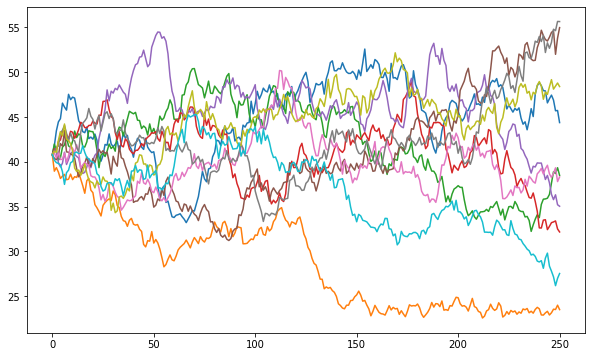

In [39]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10]);

In [41]:
p = np.maximum(S[-1] - k, 0)
p.shape

(10000,)

In [45]:
C = np.exp(-r * t) * np.sum(p)/iterations
print(f'{C:.7f}')

0.0000477


---  
## Python for Financial Analysis and Algorithmic Trading  
(Udemy)